In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn  as sns

In [5]:
df = pd.read_csv('mushroom.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
df['class'].unique()

array(['p', 'e'], dtype=object)

In [7]:
df.shape

(8124, 23)

In [8]:
X = df.drop(['class'],axis=1) #Feature Matrix
y = df['class'] #Target Variable

In [9]:
X = pd.get_dummies(X) 
X.head() #Displaying the first 5 rows of the dataset

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False


In [10]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)

[1 0 0 ... 0 1 0]


# Splitting data

In [12]:
from sklearn.model_selection import train_test_split #Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) #80% training and 20% testing
X_train.shape , X_test.shape #Displaying the shape of the training and testing data


((6499, 117), (1625, 117))

# Decision Tree with gini

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
from sklearn.metrics import accuracy_score

In [14]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

[Text(0.5769230769230769, 0.875, 'x[27] <= 0.5\ngini = 0.499\nsamples = 6499\nvalue = [3388, 3111]'),
 Text(0.3076923076923077, 0.625, 'x[53] <= 0.5\ngini = 0.288\nsamples = 3660\nvalue = [637, 3023]'),
 Text(0.15384615384615385, 0.375, 'x[55] <= 0.5\ngini = 0.135\nsamples = 3229\nvalue = [236, 2993]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.055\nsamples = 3080\nvalue = [87, 2993]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.0\nsamples = 149\nvalue = [149, 0]'),
 Text(0.46153846153846156, 0.375, 'x[94] <= 0.5\ngini = 0.13\nsamples = 431\nvalue = [401, 30]'),
 Text(0.38461538461538464, 0.125, 'gini = 0.0\nsamples = 30\nvalue = [0, 30]'),
 Text(0.5384615384615384, 0.125, 'gini = 0.0\nsamples = 401\nvalue = [401, 0]'),
 Text(0.8461538461538461, 0.625, 'x[100] <= 0.5\ngini = 0.06\nsamples = 2839\nvalue = [2751, 88]'),
 Text(0.7692307692307693, 0.375, 'x[63] <= 0.5\ngini = 0.023\nsamples = 2784\nvalue = [2751, 33]'),
 Text(0.6923076923076923, 0.125, 'gini = 0.002\nsamples = 2740\nval

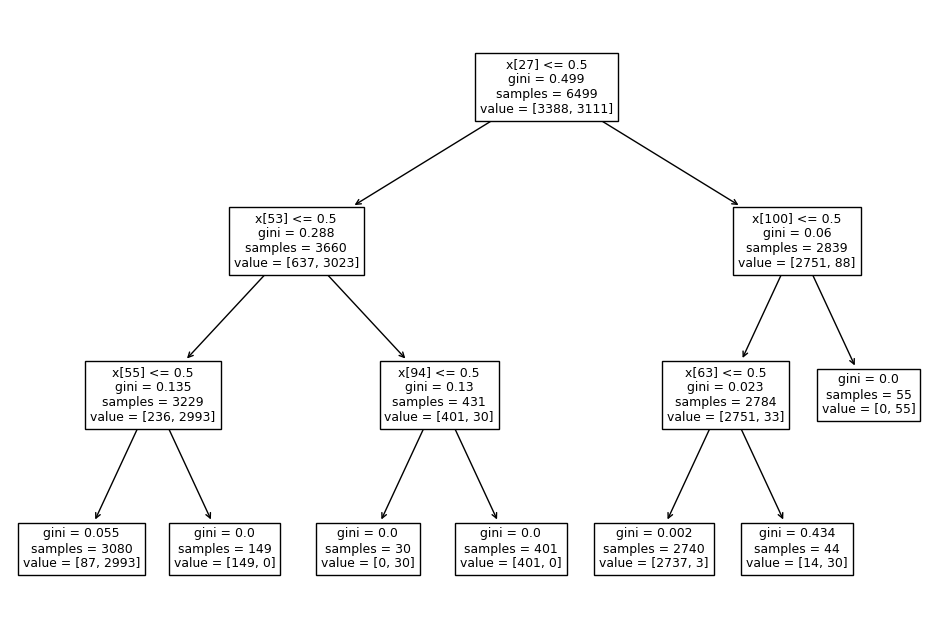

In [15]:
plt.figure(figsize=(12,8)) #Plotting the decision tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) #Displaying the decision tree

In [17]:
y_pred_gini = clf_gini.predict(X_test) #Predicting the target variable for the test data

y_pred_train_gini = clf_gini.predict(X_train) #Predicting the target variable for the training data

y_pred_train_gini #Displaying the predicted target variable for the training data

array([0, 0, 1, ..., 1, 1, 1])

In [19]:
# printing the accuracy of the model
ans_model = accuracy_score(y_test, y_pred_gini) 
print('Model accuracy score with criterion gini index :',ans_model * 100)

ans_train = accuracy_score(y_train, y_pred_train_gini)
print('Training-set accuracy score :',ans_train * 100)

Model accuracy score with criterion gini index : 99.01538461538462
Training-set accuracy score : 98.3997538082782
